In [2]:
# title: multi-dimensional scaling in python
# author: Stefan Harmeling, Tobias Uelwer

import numpy as np
import matplotlib.pyplot as plt

In [4]:
cities = ["Düsseldorf", "Hamburg", "Berlin", "München", "Frankfurt"]
X = np.array([[51, 6], 
              [53, 9], 
              [52, 13], 
              [48, 11], 
              [50, 8]])

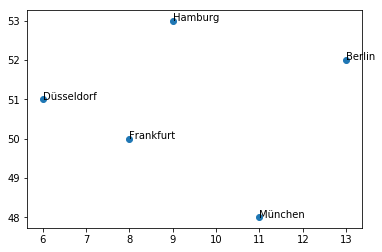

In [5]:
fig, ax = plt.subplots()
ax.scatter(X[:,1], X[:,0])
for i in range(len(cities)):
    ax.annotate(cities[i], (X[i,1],X[i,0]))

In [6]:
from scipy.spatial.distance import cdist
D = cdist(X,X)
D

array([[0.        , 3.60555128, 7.07106781, 5.83095189, 2.23606798],
       [3.60555128, 0.        , 4.12310563, 5.38516481, 3.16227766],
       [7.07106781, 4.12310563, 0.        , 4.47213595, 5.38516481],
       [5.83095189, 5.38516481, 4.47213595, 0.        , 3.60555128],
       [2.23606798, 3.16227766, 5.38516481, 3.60555128, 0.        ]])

In [7]:
def mds(A, d = 2):
    n = len(A)
    D = A**2
    
    # calculate gram matrix
    # G = -0.5 *(H @ D @ H)
    G = D - D.mean(axis=0)
    G = G - G.mean(axis=1)
    G = -0.5*G
    
    # make G symmetric
    G = (G+G.T)/2
    
    # eigenvalue decomposition
    (Lambda, V) = np.linalg.eig(G)
    
    # sort eigenvalues and eigenvectors
    pairs = sorted(zip(Lambda,V.T),
                   key=lambda x: x[0].real, reverse=True)
    
    # select the first d eigenvectors 
    Lambda = [d[0] for d in pairs[0:d]]
    V = np.array([d[1] for d in pairs[0:d]])
    
    # reconstruct data
    R = np.diag(np.sqrt(Lambda))@V
    return R.T

In [8]:
X_reconstructed = mds(D, 2)
np.allclose(cdist(X_reconstructed, X_reconstructed), D)

True

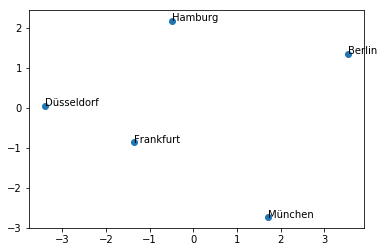

In [9]:
fig, ax = plt.subplots()
ax.scatter(X_reconstructed[:,0], 
           X_reconstructed[:,1])
for i in range(len(cities)):
    ax.annotate(cities[i], (X_reconstructed[i,0],
                            X_reconstructed[i,1]))

In [10]:
# Why we do not use the centering matrix in practice!
n = 20000
X = np.random.randn(n, 5)
print(X.mean(axis=0))

[-0.00716526  0.00109886  0.00714408  0.00739446 -0.00342582]


In [11]:
import time
start_time = time.time()
X_centered = X-X.mean(axis=0)
print(X_centered.mean(axis=0))
print("%s seconds" % np.round(time.time() - start_time, 4))

[ 1.69392278e-17  1.12243548e-17  1.07192033e-16  9.98090499e-18
 -2.82107671e-17]
0.004 seconds


In [12]:
start_time = time.time()
H = np.eye(len(X))-1/len(X)*(np.ones((len(X), len(X))))
X_centered = np.dot(H,X)
print(X_centered.mean(axis=0))
print("%s seconds" % np.round(time.time() - start_time, 4))

[ 1.33126843e-16 -6.51756427e-17  4.12114787e-17  2.50799381e-17
  7.04825087e-17]
8.7205 seconds
